In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('HR.csv')

In [7]:
print(df)
print(df.columns.tolist())

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [5]:
basic_stats = df.describe()
print(basic_stats)

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [11]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']] = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].astype(float)

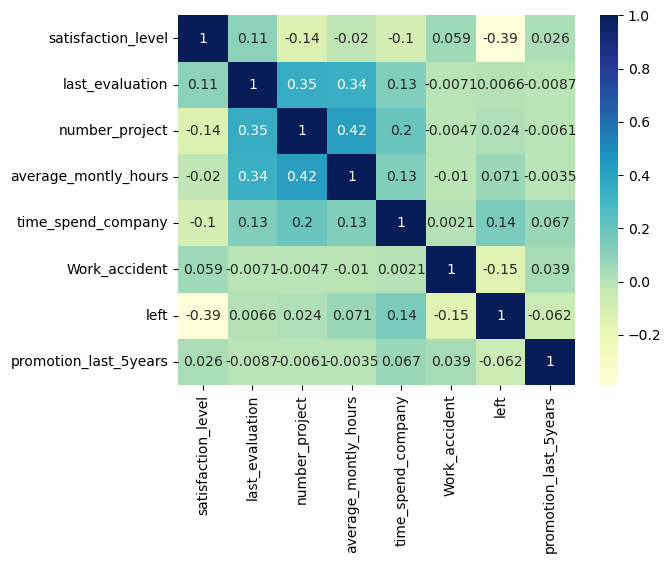

In [13]:
correlation_matrix = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [14]:
most_correlated = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated = most_correlated[most_correlated != 1.0]
print("Самые скоррелированные переменные:")
print(most_correlated[:2])

Самые скоррелированные переменные:
number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64


In [15]:
least_correlated = correlation_matrix.unstack().sort_values()
print("Наименее скоррелированные переменные:")
print(least_correlated[:2])

Наименее скоррелированные переменные:
left                satisfaction_level   -0.388375
satisfaction_level  left                 -0.388375
dtype: float64


In [16]:
employees_by_department = df['department'].value_counts()
print("Распределение сотрудников по департаментам:")
print(employees_by_department)

Распределение сотрудников по департаментам:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [17]:
salary_distribution = df['salary'].value_counts()
print("Распределение сотрудников по зарплатам:")
print(salary_distribution)

Распределение сотрудников по зарплатам:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


In [18]:
salary_distribution_by_department = df.groupby('department')['salary'].value_counts()
print("Распределение сотрудников по зарплатам в каждом департаменте:")
print(salary_distribution_by_department)

Распределение сотрудников по зарплатам в каждом департаменте:
department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   medium     225
             high       225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: count, dtype: int64


In [19]:
high_salary_hours = df[df['salary'] == "high"]['average_montly_hours']
low_salary_hours = df[df['salary'] == "low"]['average_montly_hours']
t_statistic, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)
print("p-value для гипотезы о времени, проведенном на работе в зависимости от оклада:", p_value)

p-value для гипотезы о времени, проведенном на работе в зависимости от оклада: 0.4661023478267259


In [20]:
left_stats = df.groupby('left').agg({'promotion_last_5years': 'mean', 'satisfaction_level': 'mean', 'number_project': 'mean'})
print("Показатели для уволившихся и не уволившихся сотрудников:")
print(left_stats)

Показатели для уволившихся и не уволившихся сотрудников:
      promotion_last_5years  satisfaction_level  number_project
left                                                           
0.0                0.026251            0.666810        3.786664
1.0                0.005321            0.440098        3.855503


In [21]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)
accuracy = accuracy_score(y_test, lda_predictions)
print("Accuracy модели LDA на тестовой выборке:", accuracy)

Accuracy модели LDA на тестовой выборке: 0.7533333333333333
